In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('max_colwidth', -1)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df1 = pd.read_csv("./autos.csv", encoding="ISO-8859-1")

In [4]:
df = df1.copy()
print(df1.shape)
df1.head()

(371528, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371528.00,17295.14,3587953.74,0.00,1150.00,2950.00,7200.00,2147483647.00
yearOfRegistration,371528.00,2004.58,92.87,1000.00,1999.00,2003.00,2008.00,9999.00
powerPS,371528.00,115.55,192.14,0.00,70.00,105.00,150.00,20000.00
kilometer,371528.00,125618.69,40112.34,5000.00,125000.00,150000.00,150000.00,150000.00
monthOfRegistration,371528.00,5.73,3.71,0.00,3.00,6.00,9.00,12.00
nrOfPictures,371528.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
postalCode,371528.00,50820.67,25799.08,1067.00,30459.00,49610.00,71546.00,99998.00


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [7]:
df1["dateCrawled"] = pd.to_datetime(df1["dateCrawled"])
df1["dateCreated"] = pd.to_datetime(df1["dateCreated"])

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          333659 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              351319 non-null  object        
 9   powerPS              371528 non-null  int64         
 10  model                351044 non-null  object        
 11  kilometer            371528 non-null  int64         
 12  monthOfRegistration  371528 non-null  int64         
 13  fuelType      



# Handling Missing Values
        We find the number of missing values in each column.

In [9]:
df1.isna().sum()

dateCrawled            0    
name                   0    
seller                 0    
offerType              0    
price                  0    
abtest                 0    
vehicleType            37869
yearOfRegistration     0    
gearbox                20209
powerPS                0    
model                  20484
kilometer              0    
monthOfRegistration    0    
fuelType               33386
brand                  0    
notRepairedDamage      72060
dateCreated            0    
nrOfPictures           0    
postalCode             0    
lastSeen               0    
dtype: int64

* It is always a good practice to have visualization of data before treating any of the noisy or missing data. But in our example we can identify a pattern that most of the columns have similar missing values, hence we first look into these missing values and remove if necessary and try to save the computation time required to go through entire dataset length.

        There are plenty of mising values, it is not feasible to remove these missing values without understanding the importance of each feature to predict price of vehicle.
        We see that many features have same number of missing values, hence we examine these features to find a pattern in missingness.

In [10]:
df1.shape

(371528, 20)

In [11]:
df2 = df1.dropna(thresh=1)
print(df2.shape)
df2.isna().sum()

(371528, 20)


dateCrawled            0    
name                   0    
seller                 0    
offerType              0    
price                  0    
abtest                 0    
vehicleType            37869
yearOfRegistration     0    
gearbox                20209
powerPS                0    
model                  20484
kilometer              0    
monthOfRegistration    0    
fuelType               33386
brand                  0    
notRepairedDamage      72060
dateCreated            0    
nrOfPictures           0    
postalCode             0    
lastSeen               0    
dtype: int64

    df2 dataset contains observations with atleast one non-missing value. 
    We can see that some features have 1 or 2 missing values. We can try to:
        * remove these missing values and check how much data is lost
        * if huge amount of data is lost we can try to impute whichever possible by using imputation techniques

In [12]:
df3 = df2.dropna(thresh=12)
print(df3.shape)
df3.isna().sum()

(371528, 20)


dateCrawled            0    
name                   0    
seller                 0    
offerType              0    
price                  0    
abtest                 0    
vehicleType            37869
yearOfRegistration     0    
gearbox                20209
powerPS                0    
model                  20484
kilometer              0    
monthOfRegistration    0    
fuelType               33386
brand                  0    
notRepairedDamage      72060
dateCreated            0    
nrOfPictures           0    
postalCode             0    
lastSeen               0    
dtype: int64

        We have successfully removed the 1 or 2 missing values from df2 by removing 2 observations and stored the result in new dataframe df3.
        df3 has 5 columns that have large amount of missing values, removing which result in huge loss of data.
        
# Exploratory Data Analysis
        

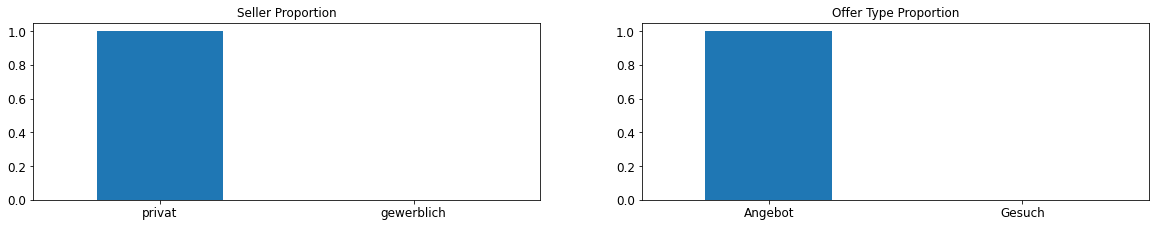

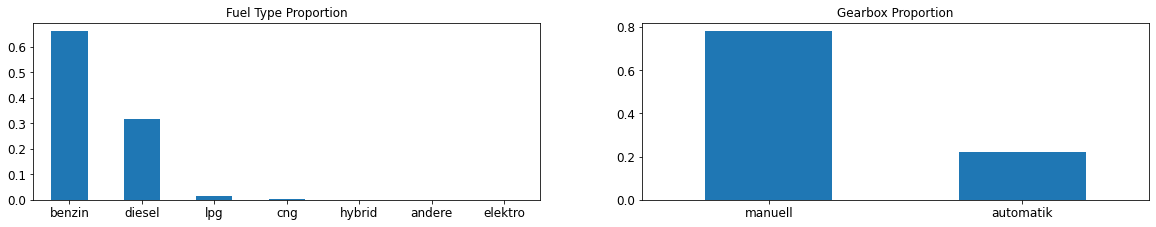

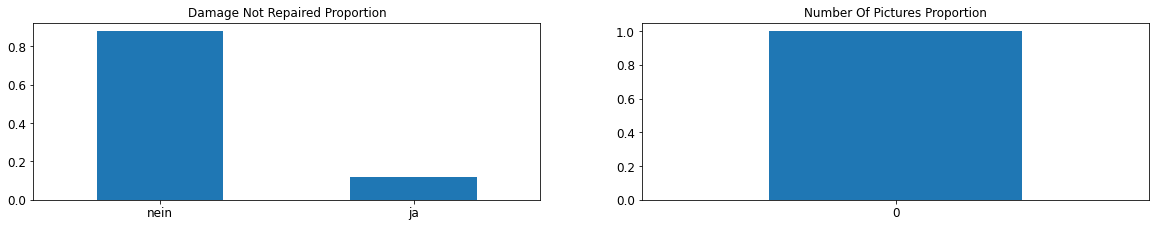

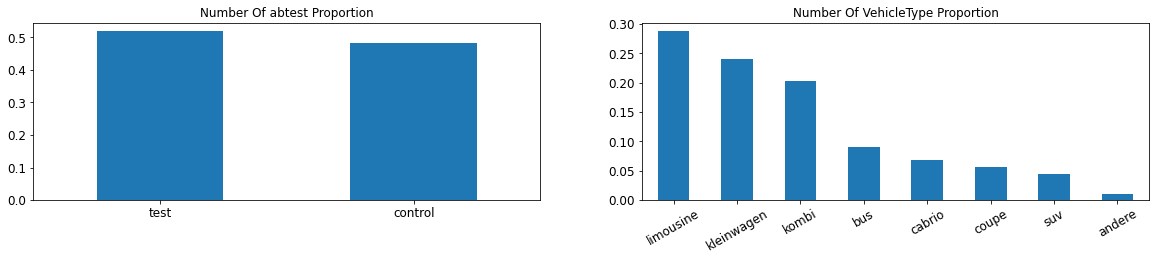

In [13]:
plt.subplots(figsize=(20,15))
plt.subplot(421)
df3["seller"].value_counts(100).plot(kind='bar', title="Seller Proportion", fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.subplot(422)
df3["offerType"].value_counts(100).plot(kind='bar', title='Offer Type Proportion', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

plt.subplots(figsize=(20,15))
plt.subplot(423)
df3["fuelType"].value_counts(100).plot(kind='bar', title='Fuel Type Proportion', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.subplot(424)
df3["gearbox"].value_counts(100).plot(kind='bar', title='Gearbox Proportion', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

plt.subplots(figsize=(20,15))
plt.subplot(425)
df3["notRepairedDamage"].value_counts(100).plot(kind='bar', title='Damage Not Repaired Proportion', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.subplot(426)
df3["nrOfPictures"].value_counts(100).plot(kind='bar', title='Number Of Pictures Proportion', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

plt.subplots(figsize=(20,15))
plt.subplot(427)
df3["abtest"].value_counts(100).plot(kind='bar', title='Number Of abtest Proportion', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
#plt.show()

plt.subplot(428)
df3["vehicleType"].value_counts(100).plot(kind='bar', title='Number Of VehicleType Proportion', fontsize=18)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()



        From above plot we can see that seller, offerType and nrOfPictures are very very sparse with more than 99.99% being of one particular cateogory. 
        Such variable will have no effect on model performance and hence we drop these features.
        Also abtest variable does not provide any meaningful information to predict the price of the vehicle.
        We also remove dateCrawled, dateCreated and lastSeen features which are less important for our problem to predict    price.

In [17]:
df3["YearCrawled"] = df3["dateCrawled"].dt.year
df3["YearCreated"] = df3["dateCreated"].dt.year


In [18]:
df4 = df3.drop(['seller','offerType','abtest','nrOfPictures','dateCrawled', 'dateCreated', 'lastSeen','name','postalCode'], axis=1)
df4.shape

(371528, 13)

    We will use df4 dataset for further exploratory data analysis

In [19]:
df4.kilometer = df4.kilometer.astype('int64')

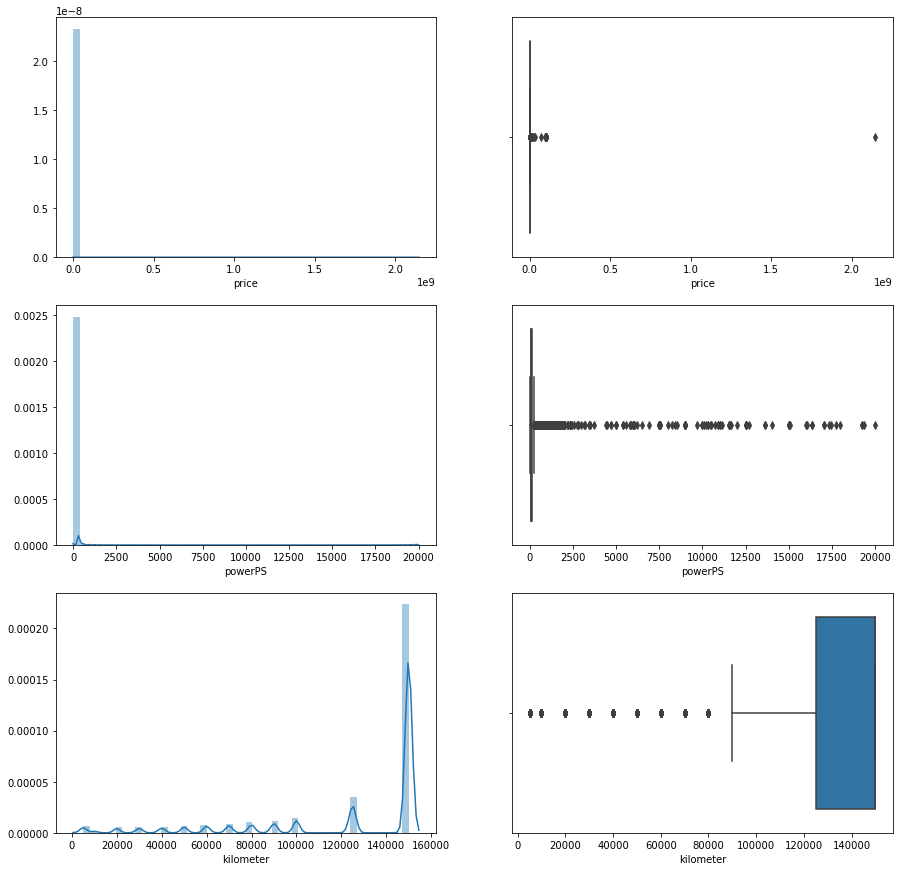

In [20]:
# Distribution of target variable
plt.subplots(figsize=(15,15))
plt.subplot(321)
sns.distplot(df4["price"])
plt.subplot(322)
sns.boxplot(df4["price"])

# Distribution of powerPS variable
plt.subplot(323)
sns.distplot(df4["powerPS"])
plt.subplot(324)
sns.boxplot(df4["powerPS"])

# Distribution of kilometer variable
plt.subplot(325)
sns.distplot(df4["kilometer"])
plt.subplot(326)
sns.boxplot(df4["kilometer"])

plt.show()

        The original distribution plot and box plot shows there are extreme extreme outliers that shadows the rest of the    datapoints in the plot. Hence we check these observations and then take further actions whether to remove or replace.

In [21]:
qunatiles=[0.04,0.1,0.15,0.25,0.5,0.75,0.99,0.995,0.9999,0.99999,1]
qnt = np.quantile(a = df4["price"], q = qunatiles)
print("Qunatile","---","Value")
for i, q1 in enumerate(qnt):
    print(qunatiles[i],"---", '{:.2f}'.format(q1))


Qunatile --- Value
0.04 --- 140.00
0.1 --- 500.00
0.15 --- 700.00
0.25 --- 1150.00
0.5 --- 2950.00
0.75 --- 7200.00
0.99 --- 36000.00
0.995 --- 47500.00
0.9999 --- 11111111.00
0.99999 --- 99999999.00
1 --- 2147483647.00


In [22]:
qnt = np.quantile(a=df4["powerPS"], q=qunatiles)
print("Qunatile","---","Value")
for i, q1 in enumerate(qnt):
    print(qunatiles[i],"---", '{:.2f}'.format(q1))

print(df4[(df4['powerPS'] > 404) | (df4['powerPS'] <1)].shape)

Qunatile --- Value
0.04 --- 0.00
0.1 --- 0.00
0.15 --- 54.00
0.25 --- 70.00
0.5 --- 105.00
0.75 --- 150.00
0.99 --- 340.00
0.995 --- 404.00
0.9999 --- 10879.46
0.99999 --- 18295.32
1 --- 20000.00
(42677, 13)


In [23]:
qnt = np.quantile(a=df4["kilometer"], q=qunatiles)
print("Qunatile","---","Value")
for i, q1 in enumerate(qnt):
    print(qunatiles[i],"---", '{:.2f}'.format(q1))

Qunatile --- Value
0.04 --- 30000.00
0.1 --- 60000.00
0.15 --- 80000.00
0.25 --- 125000.00
0.5 --- 150000.00
0.75 --- 150000.00
0.99 --- 150000.00
0.995 --- 150000.00
0.9999 --- 150000.00
0.99999 --- 150000.00
1 --- 150000.00


In [24]:
print(df4[df4['price'] > 47500].shape)
df5 = df4[(df4['price'] <= 47500) & (df4['price'] > 50) & (df4['powerPS'] > 10) & (df4['powerPS'] < 404)]
print(df5.shape)

(1839, 13)
(319585, 13)


        The 99.5th percentile of the price data is 47500, so we drop the rows with price greater than 47500 since it indicates there is noise in data or this data refers to a highly luxury vehicle category which does not represent the 99.5% of our data. Including this data in model will cause the model to necessarily fit to these noises and overfit on train data.
        The number of observations are 1340 which we can remove since it forms part of only 0.5% of data.
        
        We can see that we have price starting from 0, which does not seem to be correct information, by looking the data we can understand that those vehicles having registration year in 1990s have very low price of order of 50-100. Hence we drop the rows with price less than 50.
        
        Many observations have power values either 0 or very high which does not seem feasible. Hence we choose the values between 10 and 408 which are 11th and 99.5th percentile respectively.
        
        kilometer feature has range from 5000 to 150000, with 65% of the values are 150000, this seems to be real value hence we do not modify this feature

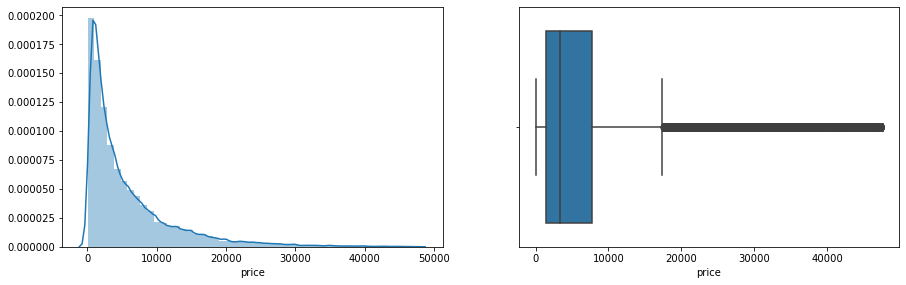

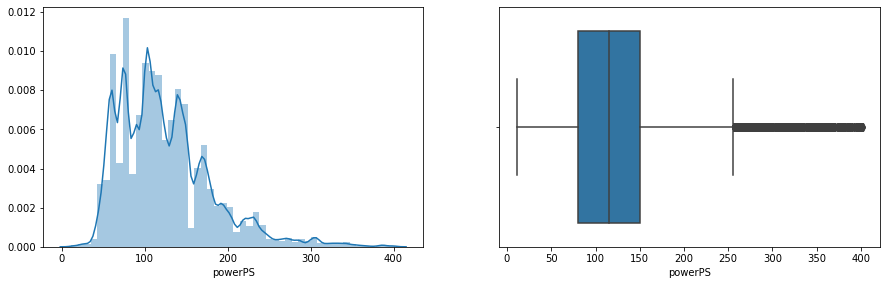

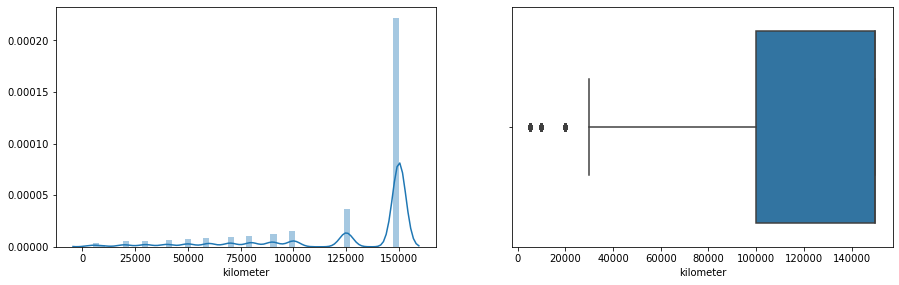

In [25]:
# Distribution of target variable
plt.subplots(figsize=(15,15))
plt.subplot(321)
sns.distplot(df5["price"])
plt.subplot(322)
sns.boxplot(df5["price"])

# Distribution of powerPS variable
plt.subplots(figsize=(15,15))
plt.subplot(323)
sns.distplot(df5["powerPS"])
plt.subplot(324)
sns.boxplot(df5.powerPS)

# Distribution of kilometer variable
plt.subplots(figsize=(15,15))
plt.subplot(325)
sns.distplot(df5["kilometer"])
plt.subplot(326)
sns.boxplot(df5["kilometer"])

plt.show()

        The price data is still skewed to right which means the data majorly consists of lower segment vehicles. Hence for  computation we need to scale data using appropriate scaling measures.
        
         Lets see how price varied with power of the vehicle

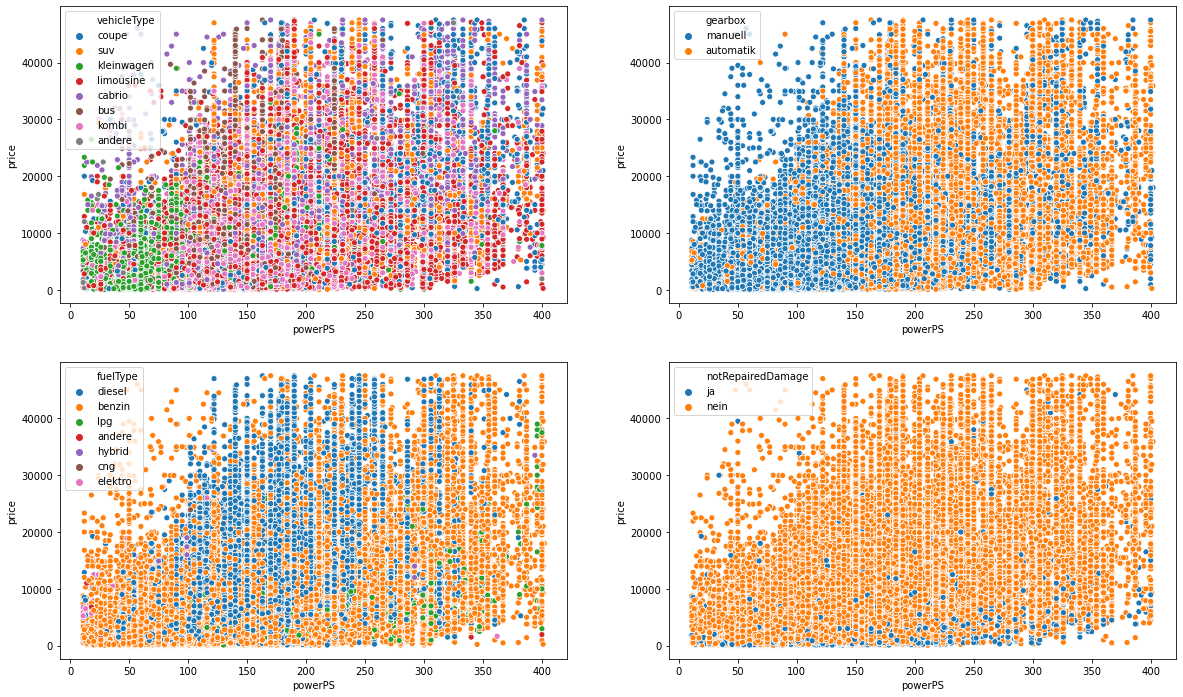

Wall time: 47.3 s


In [26]:
%%time
plt.subplots(figsize=(20,12))
plt.subplot(221)
sns.scatterplot(x=df5["powerPS"], y=df5["price"], hue=df5["vehicleType"])

plt.subplot(222)
sns.scatterplot(x=df5["powerPS"], y=df5["price"], hue=df5["gearbox"])

plt.subplot(223)
sns.scatterplot(x=df5["powerPS"], y=df5["price"], hue=df5["fuelType"])

plt.subplot(224)
sns.scatterplot(x=df5["powerPS"], y=df5["price"], hue=df5["notRepairedDamage"])

plt.show()

        Year of registration is an important feature since it clearly shows how old a vehicle is.

In [30]:
print(sorted(df5["yearOfRegistration"].unique()))

[1000, 1234, 1500, 1800, 1910, 1911, 1923, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2800, 2900, 3000, 4500, 5000, 5911, 6000, 8200, 9000, 9999]


In [31]:
print(df5["YearCrawled"].unique())
print(df5["YearCreated"].unique())

[2016]
[2016 2015]


        There is incorrect information in the data of yearOfRegistration as we can observe yearOfRegistration is after the   dateCrawled in some cases. We remove such observations as yearOfRegistration information cannot be reproduced to impute.
        We can replace yearOfRegistration with previous few years based on our understanding of average km run per year and model.
        Even the yearOfRegistration values which indicate too old model is very unlikely to be available now for sale. So    these are possible noise in the data, we use similar replacement technique to repalce yearOfRegistration values less         than 2000.

In [32]:
df6 = df5.copy()
df6.yearOfRegistration[((df6['yearOfRegistration'] > 2015) | (df6['yearOfRegistration'] < 2000)) & (df6['kilometer'] <= 10000)] = 2015
df6.yearOfRegistration[((df6['yearOfRegistration'] > 2015) | (df6['yearOfRegistration'] < 2000)) & (df6['kilometer'] <= 20000) & (df6['kilometer'] > 10000)] = 2014
df6.yearOfRegistration[((df6['yearOfRegistration'] > 2015) | (df6['yearOfRegistration'] < 2000)) & (df6['kilometer'] > 20000)] = 2013
df6.yearOfRegistration[((df6['yearOfRegistration'] > 2015) | (df6['yearOfRegistration'] < 2000)) & (df6['kilometer'] <= 40000) & (df6['kilometer'] > 30000)] = 2012
df6.yearOfRegistration[((df6['yearOfRegistration'] > 2015) | (df6['yearOfRegistration'] < 2000)) & (df6['kilometer'] <= 50000) & (df6['kilometer'] > 40000)] = 2011
df6.yearOfRegistration[((df6['yearOfRegistration'] > 2015) | (df6['yearOfRegistration'] < 2000)) & (df6['kilometer'] <= 60000) & (df6['kilometer'] > 50000)] = 2010
df6.yearOfRegistration[((df6['yearOfRegistration'] > 2015) | (df6['yearOfRegistration'] < 2000)) & (df6['kilometer'] <= 70000) & (df6['kilometer'] > 60000)] = 2009
df6.yearOfRegistration[((df6['yearOfRegistration'] > 2015) | (df6['yearOfRegistration'] < 2000)) & (df6['kilometer'] <= 80000) & (df6['kilometer'] > 70000)] = 2008
df6.yearOfRegistration[((df6['yearOfRegistration'] > 2015) | (df6['yearOfRegistration'] < 2000)) & (df6['kilometer'] <= 90000) & (df6['kilometer'] > 80000)] = 2007
df6.yearOfRegistration[((df6['yearOfRegistration'] > 2015) | (df6['yearOfRegistration'] < 2000)) & (df6['kilometer'] <= 100000) & (df6['kilometer'] > 90000)] = 2006
df6.yearOfRegistration[((df6['yearOfRegistration'] > 2015) | (df6['yearOfRegistration'] < 2000)) & (df6['kilometer'] <= 125000) & (df6['kilometer'] > 100000)] = 2005
df6.yearOfRegistration[((df6['yearOfRegistration'] > 2015) | (df6['yearOfRegistration'] < 2000)) & (df6['kilometer'] > 125000)] = 2004

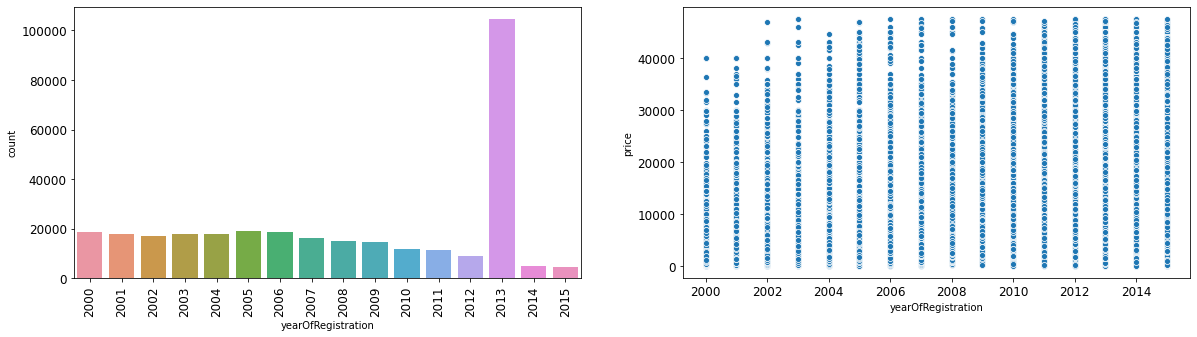

In [35]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.countplot(df6["yearOfRegistration"])
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
#plt.xlabel(s='Year Of Registration', fontsize=15)
#plt.ylabel(s='Count', fontsize=15)

plt.subplot(122)
sns.scatterplot(x=df6["yearOfRegistration"], y=df6["price"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#.xlabel(s='Year Of Registration', fontsize=15)
#plt.ylabel(s='Price', fontsize=15)
plt.show()

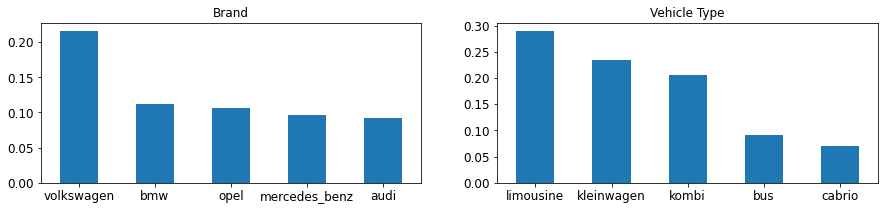

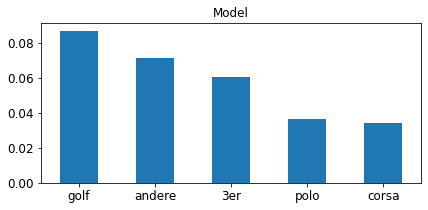

In [36]:
plt.subplots(figsize=(15,10))
plt.subplot(321)
df6["brand"].value_counts(100)[:5].plot(kind='bar', title="Brand", fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.subplot(322)
df6["vehicleType"].value_counts(100)[:5].plot(kind='bar', title='Vehicle Type', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

plt.subplots(figsize=(15,10))
plt.subplot(323)
df6["model"].value_counts(100)[:5].plot(kind='bar', title='Model', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()

In [37]:
df6.columns

Index(['price', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'YearCrawled', 'YearCreated'],
      dtype='object')

In [38]:
df6.drop(["YearCrawled", "YearCreated"], axis = 1, inplace = True)

# Missing Value Imputation with Decision Tree Classifier

        The notRepairedDamage column is easy to impute with mode 'nein'.
        We have 4 variables left now with missing values - vehicleType, model, gearbox, fuelType
        To impute the categorical variable we use decision tree classifier with each column as predicted, one by one           starting with gearbox with least number of missing values

In [39]:
print(df6.shape)
df6.notRepairedDamage = df6['notRepairedDamage'].fillna(method='ffill')
df6.isna().sum()

(319585, 11)


price                  0    
vehicleType            21264
yearOfRegistration     0    
gearbox                6051 
powerPS                0    
model                  12540
kilometer              0    
monthOfRegistration    0    
fuelType               19685
brand                  0    
notRepairedDamage      0    
dtype: int64

In [40]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [41]:
# vehicleType column

# filter data for model building
X = df6[df6['vehicleType'].notna()].drop(['vehicleType','model'], axis=1)
y = df6.vehicleType[df6['vehicleType'].notna()]

# create test data with unknown vehicleType fields
xt = df6[df6['vehicleType'].isna()].drop(['vehicleType','model'], axis=1)

# one-hot encode the categorical variables
X_dum = pd.get_dummies(X)
xt_dum = pd.get_dummies(xt)

# build a decision tree model
dtree_veh = DecisionTreeClassifier().fit(X_dum,y)

# predict on test data
veh_pred = dtree_veh.predict(xt_dum)

# fill the missing values with the predicted values
df6.vehicleType[df6['vehicleType'].isna()] = veh_pred
df6.vehicleType.isna().sum()

0

In [42]:
# model column

# filter data for model building
X = df6[df6['model'].notna()].drop(['model'], axis=1)
y = df6.model[df6['model'].notna()]

# create test data with unknown model fields
xt = df6[df6['model'].isna()].drop(['model'], axis=1)

# one-hot encode the categorical variables
X_dum = pd.get_dummies(X)
xt_dum = pd.get_dummies(xt)
xt_dum.drop('brand_sonstige_autos', axis=1, inplace=True)

# build a decision tree model
dtree_model = DecisionTreeClassifier().fit(X_dum,y)

# predict on test data
model_pred = dtree_model.predict(xt_dum)

# fill the missing values with the predicted values
df6.model[df6['model'].isna()] = model_pred
df6.model.isna().sum()

0

In [43]:
# gearbox column

# filter data for model building
X = df6[df6['gearbox'].notna()].drop(['gearbox'], axis=1)
y = df6.gearbox[df6['gearbox'].notna()]

# create test data with unknown gearbox fields
xt = df6[df6['gearbox'].isna()].drop(['gearbox'], axis=1)

# one-hot encode the categorical variables
X_dum = pd.get_dummies(X)
xt_dum = pd.get_dummies(xt)
for col in X_dum.columns:
    if col not in xt_dum:
        xt_dum[col] = np.zeros(len(xt_dum))
        
# build a decision tree model
dtree_gear = DecisionTreeClassifier().fit(X_dum,y)

# predict on test data
gear_pred = dtree_gear.predict(xt_dum)

# fill the missing values with the predicted values
df6.gearbox[df6['gearbox'].isna()] = gear_pred
df6.gearbox.isna().sum()

0

In [44]:
# fuelType column

# filter data for model building
X = df6[df6['fuelType'].notna()].drop(['fuelType'], axis=1)
y = df6.fuelType[df6['fuelType'].notna()]

# create test data with unknown fuelType fields
xt = df6[df6['fuelType'].isna()].drop(['fuelType'], axis=1)

# one-hot encode the categorical variables
X_dum = pd.get_dummies(X)
xt_dum = pd.get_dummies(xt)
for col in X_dum.columns:
    if col not in xt_dum:
        xt_dum[col] = np.zeros(len(xt_dum))
        
# build a decision tree model
dtree_fuel = DecisionTreeClassifier().fit(X_dum,y)

# predict on test data
fuel_pred = dtree_fuel.predict(xt_dum)

# fill the missing values with the predicted values
df6.fuelType[df6['fuelType'].isna()] = fuel_pred
df6.fuelType.isna().sum()

0

In [45]:
print(df6.shape)
df6.isna().sum()

(319585, 11)


price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

# Model Building
        We have handled all the missing values, now we can check for multicollinearity. We handle this multicollinearity if correlation value is greater than 0.7 or less than -0.7

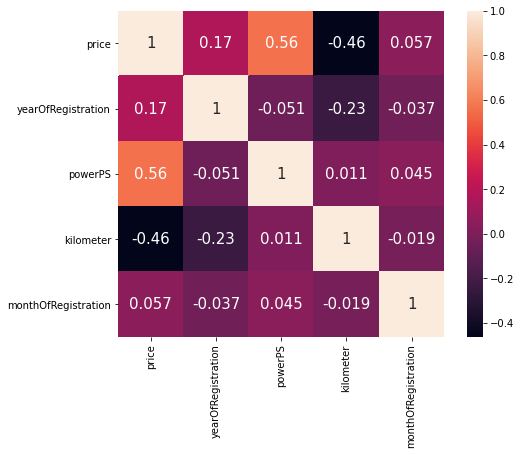

In [46]:
plt.subplots(figsize=(8,6))
sns.heatmap(df6.corr(), annot=True, square=True, annot_kws={'fontsize':15})
plt.show()

        There is not multicollinearity between the variables, however we can see that monthOfRegistration has very low       correlation with price, hence we will remove it while building the model.

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

        We create train and test dataset from df6

In [48]:
X = df6.drop('price', axis=1)
y = df6.price

X_dum = pd.get_dummies(X)
X_scaled = scale(X_dum)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)

### Multilinear Regression with cross validation score

In [49]:
linreg = LinearRegression().fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print("R2_Score for linear regression: {:.2f}".format(linreg.score(X_test, y_test)))
print("RMSE score: {}".format(np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))))

mse_all = cross_val_score(linreg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
reg_cv = cross_val_score(linreg, X_train, y_train, cv=5)
mean_mse_linreg = np.mean(mse_all)
print("mean MSE with 5k cross validation linear regression: {:.2f}".format(mean_mse_linreg))
print("R2_score with 5k cross validation linear regression: {:.2f}".format(np.mean(reg_cv)))

R2_Score for linear regression: 0.68
RMSE score: 3722.078067365524
mean MSE with 5k cross validation linear regression: -13893122.83
R2_score with 5k cross validation linear regression: 0.68


In [50]:
ridge = Ridge(alpha=0.05, normalize=True)

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("R2_score with Ridge regression: {:.2f}".format(ridge.score(X_test, y_test)))

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X_train, y_train, cv=5)
# Print the cross-validated scores
print("R2_score with 5k cross validation Ridge regression: {:.2f}".format(np.mean(ridge_cv)))


R2_score with Ridge regression: 0.68
R2_score with 5k cross validation Ridge regression: 0.68


In [51]:
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X_train,y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_.tolist()
print(lasso_coef)

[503.09732275747564, 3064.9552739828523, -2784.8618808018473, 0.0, -0.0, 0.0, 232.9558018236217, 0.0, 0.0, -79.59350703444385, -55.88097720395304, 198.55425861198142, 179.23158657553435, -8.917684536728129e-13, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 85.60093605947654, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -3.0375696322770365, -0.0, -0.0, -0.0, -0.0, -0.0, 283.1192615422757, 0.0, 0.0, 0.0, 0.0, 248.00176393240395, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 14.416568420962092, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 10.405594119409317, -0.0, -0.0, -0.0, 0.0, 50.79539796168791, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0

        Lasso gives us the important feature set, by reducing the weights of non-important features to 0.

In [52]:
df6.skew()

price                 2.21 
yearOfRegistration    -0.29
powerPS               1.20 
kilometer             -1.51
monthOfRegistration   0.06 
dtype: float64

2.2120796915209
(5830.599993741884, 6611.697691381239)


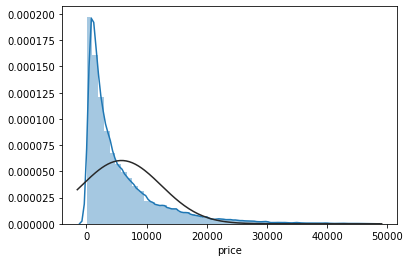

In [53]:
from scipy.stats import norm
sns.distplot(df6.price, fit=norm)
print(df6.price.skew())
print(norm.fit(df6.price))

((array([-4.59450435, -4.40600881, -4.30382568, ...,  4.30382568,
          4.40600881,  4.59450435]),
  array([   55,    55,    55, ..., 47500, 47500, 47500], dtype=int64)),
 (5752.33620443693, 5830.599993741883, 0.8700110270132634))

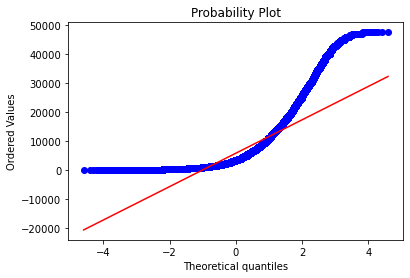

In [54]:
from scipy import stats

stats.probplot(df6.price, plot=plt)

        For positive skew use log

In [55]:
df7 = df6.copy()
df7.price = np.log(df6.price)

-0.2330484163410446
(8.075020223892182, 1.16603375946602)


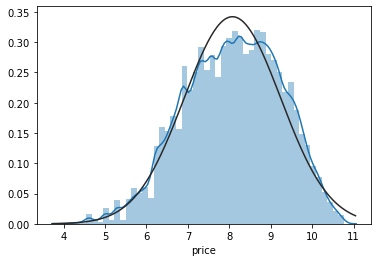

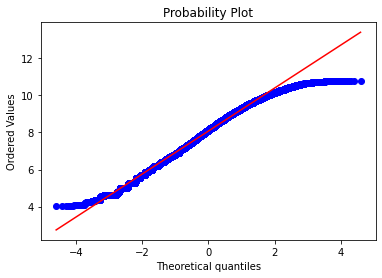

In [56]:
sns.distplot(df7.price, fit=norm)
print(df7.price.skew())
print(norm.fit(df7.price))
plt.show()

stats.probplot(df7.price, plot=plt)

plt.show()

In [57]:
# df7 = 

X_dum = pd.get_dummies(df7)

X = X_dum.drop('price', axis=1)
y = X_dum.price

# X_scaled = scale(X_dum)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [58]:
ridge = Ridge(alpha=0.05, normalize=True)

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("R2_score with Ridge regression: {:.2f}".format(ridge.score(X_test, y_test)))
# print("Ridge best parameter: {:.2f}".format(ridge.best_params_))
# print("Ridge best R2_score: {:.2f}".format(ridge.best_score_))

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X_train, y_train, cv=5)
# Print the cross-validated scores
print("R2_score with 5k cross validation Ridge regression: {:.2f}".format(np.mean(ridge_cv)))


R2_score with Ridge regression: 0.67
R2_score with 5k cross validation Ridge regression: 0.67


In [59]:
ridge.score(X_train,y_train)

0.6660484607092093

In [60]:
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X_train,y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_.tolist()
print(lasso_coef)
y_lasspred = lasso.predict(X_test)
lasso.score(X_test,y_test)

[-0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.

-4.6111178467533875e-05